**Описание проекта**

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

Нужно построить модель с максимально большим значением accuracy. Необходимо довести долю правильных ответов по крайней мере до 0.75.

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.dummy import DummyClassifier

Выведем датасет для проверки

In [19]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv("C:\\DS\\YP\\S9\\users_behavior.csv")

In [20]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

сalls — количество звонков,

minutes — суммарная длительность звонков в минутах,

messages — количество sms-сообщений,

mb_used — израсходованный интернет-трафик в Мб,

is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

# 1. Подготовка данных

Вывод инофрмации о датафрейме

In [21]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Проверка на пропуски

In [22]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Проверка на дубликаты

In [23]:
df.duplicated().sum()

0

Посмотрим описание на данных

In [24]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Данные уже хорошо подготовлены. Дальнейшей подготоки не требуется.

Построим графики корреляции с помощью библиотки seaborn

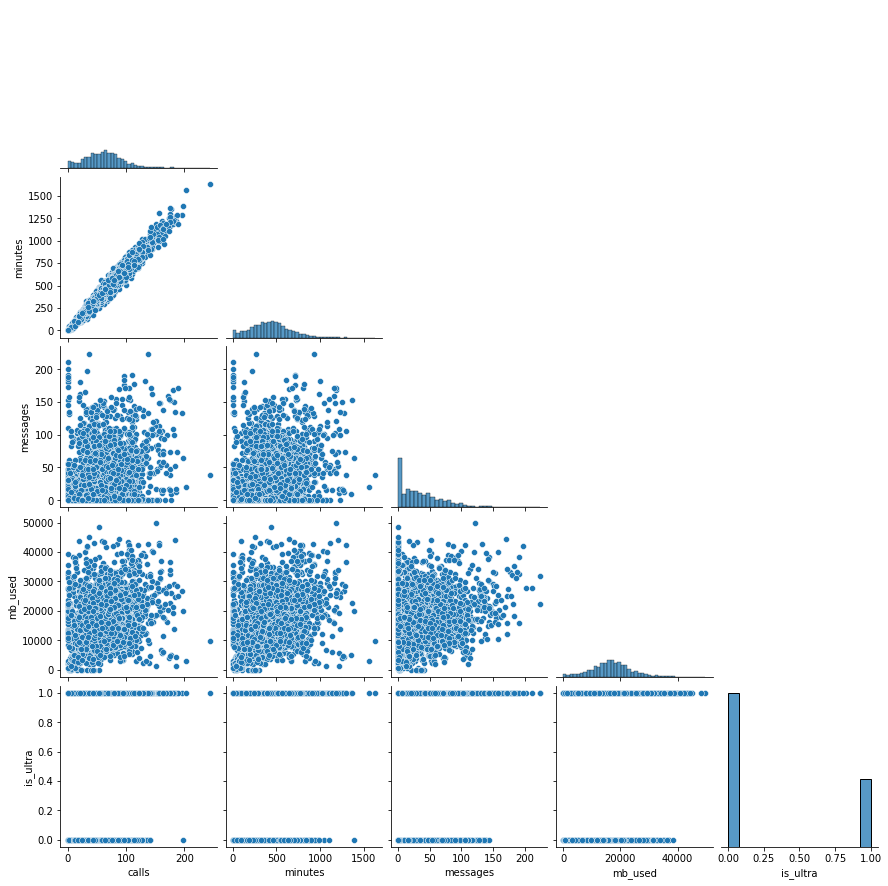

In [25]:
sns.pairplot(df, corner=True);

Наиболее заметная корреляция между количеством звонков 'calls' и суммарной длительностью звонков 'minutes'

Поcтрою график с подсветкой по звонкам

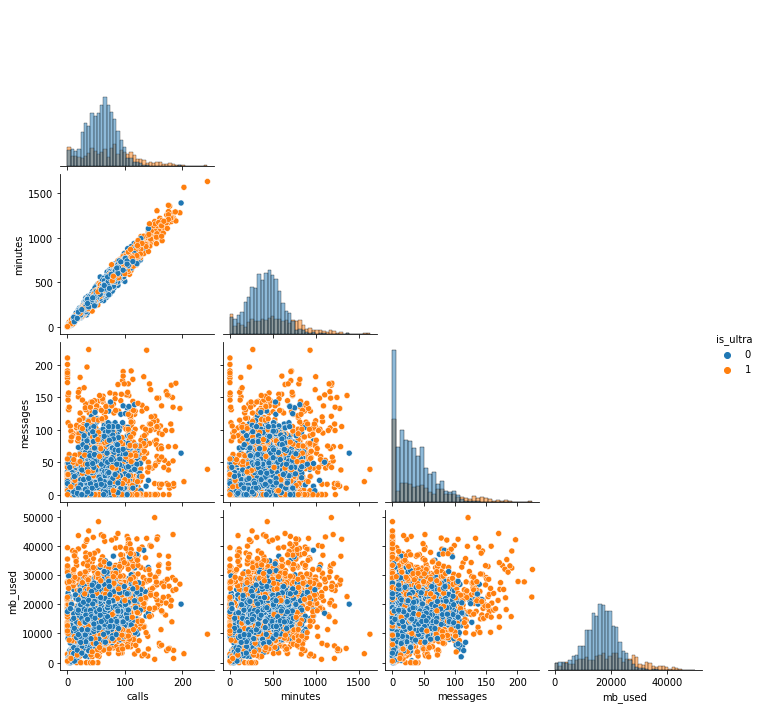

In [26]:
sns.pairplot(df, hue='is_ultra', diag_kind='hist', corner=True);

# 2. Разбиение данных на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки.

In [27]:
# Определяем тестовую выборку
features = df.drop(['is_ultra'], axis=1) # данные для обучения
target = df['is_ultra'] # целевые значения

In [28]:
# Разделение на обучающую и валидационную выборки
df_train, df_test = train_test_split(df, test_size=0.5, random_state=888)
df_test, df_valid = train_test_split(df_test, test_size=0.5, random_state=888)


# опеределяем выборки
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

In [29]:
# проверка
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(1607, 4)
(1607,)
(803, 4)
(803,)
(804, 4)
(804,)


# 3. Исследование качества моделей

Первой исследуем качетсво модели "дерево решений", разной глубины. Глубина от 1 до 5

In [30]:
#Создадим цикл с изменением глубины дерева
best_depth = 0
best_result = 0
for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(random_state=888, max_depth = depth) # обучение модели с заданной глубиной
    model_tree.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predictions = model_tree.predict(features_valid) # подсчёт качества модели на валидационной выборке
    result = accuracy_score(target_valid, predictions)
    if result > best_result:
        best_result = result
        best_depth = depth
        
print('Лучшая точность:', best_result, ', с глубиной:', best_depth)    
    

Лучшая точность: 0.8109452736318408 , с глубиной: 3


Выяснили, что лучшую точность даёт глубина 3

Далее исследуем качество модели "случайный лес", с разным количеством деревьев. От 1 до 12.

In [31]:
best_model = None
best_result = 0
best_est = None
best_depth = 0
for est in range(1, 40):
    for depth in range(1, 6):
        model_forest = RandomForestClassifier(random_state=888, n_estimators=est, max_depth = depth) # обучение модели с заданным числом деревьев
        model_forest.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predictions = model_forest.predict(features_valid)
        result = accuracy_score(target_valid, predictions) # подсчёт качества модели на валидационной выборке
        if result > best_result:
            best_result = result # сохранение наилучшего значений метрики accurcy на валидационных данных
            best_est = est
            best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "с количеством деревьев:", best_est,
     "и глубиной деревьев:", best_depth)
    

Accuracy наилучшей модели на валидационной выборке: 0.8296019900497512 с количеством деревьев: 33 и глубиной деревьев: 5


Лучший показатель точности у модели "Случайный лес" с количеством деревьев: 33, глубиной деревьев 5.

# 4. Проверка качества модели на тестовой выборке.

Проверим качество модели "дерево решений" с глубиной 3, на тестовой выборке. Перед тестированием объединим тренировочную и валидационную выборку. Обучем и сравним модели на объединённой и на необъединённой выборках

In [32]:
model_tree = DecisionTreeClassifier(random_state=888, max_depth=3)

# объединение тренировочной и валидационной выборки
features_train_v = features_train.append(features_valid)
target_train_v = target_train.append(target_valid)

# обучение модели на объединённой выборке выборке
model_train_tree_v= model_tree.fit(features_train_v, target_train_v)
# обучние на тренировочной выборке
model_train_tree= model_tree.fit(features_train, target_train) 




# предсказание по объединённой обучающей выборке
predictions_train_tree_v = model_train_tree_v.predict(features_train_v)
# предсказание по обучающей выборке
predictions_train_tree = model_train_tree.predict(features_train)
# Предсказание по тестовой выборке
predictions_test_tree = model_train_tree.predict(features_test)

# подсчёт точности
accuracy_train_v_tree = accuracy_score(target_train_v, predictions_train_tree_v)
accuracy_train_tree = accuracy_score(target_train, predictions_train_tree)

accuracy_test_tree = accuracy_score(target_test, predictions_test_tree)

# вывод точности для сравнения
print("Accuracy")
print("Обучающая выборка:", accuracy_train_tree)
print("Обучающая объединённая выборка:", accuracy_train_v_tree)
print()
print("Тестовая выборка:", accuracy_test_tree) 

Accuracy
Обучающая выборка: 0.791537025513379
Обучающая объединённая выборка: 0.7980091248444628

Тестовая выборка: 0.7870485678704857


Показатели довольно близки. Обучение на объединённой модели прошло немного лучше

Далее проверим модель случайный лес. Перед тестированием объединим тренировочную и валидационную выборку. Обучем и сравним модели на объединённой и на необъединённой выборках

In [33]:
# обучение модели с заданным числом и глубиной деревьев 
model_forest = RandomForestClassifier(random_state=888, n_estimators=33, max_depth=5) 

# объединение тренировочной и валидационной выборки
features_train_v = features_train.append(features_valid)
target_train_v = target_train.append(target_valid)

# обучение модели на объединённой выборке выборке
model_test_v= model_forest.fit(features_train_v, target_train_v)
# обучние на тренировочной выборке
model_test= model_forest.fit(features_train, target_train) 


    
# предсказание по объединённой обучающей выборке
predictions_train_v = model_test_v.predict(features_train_v)

# предсказание по обучающей выборке
predictions_train = model_test.predict(features_train)

# Предсказание по тестовой выборке
predictions_test = model_test.predict(features_test)


# подсчёт точности по объедиённой выборке
accuracy_train_v_forest = accuracy_score(target_train_v, predictions_train_v)
# подсчёт точности по тренировочной выборке
accuracy_train_forest = accuracy_score(target_train, predictions_train)


accuracy_test_forest = accuracy_score(target_test, predictions_test)

# вывод точности для сравнения
print("Accuracy")
print("Обучающая выборка:", accuracy_train_forest)
print("Обучающая объединённая выборка:", accuracy_train_v_forest)
print()
print("Тестовая выборка:", accuracy_test_forest) 

Accuracy
Обучающая выборка: 0.820784069695084
Обучающая объединённая выборка: 0.823724595603484

Тестовая выборка: 0.7957658779576587


Обучение на объединённой модели прошло немного лучше

# 5. Проверка модели на вменяемость

Проверим на вменяемость модель "дерево решений" и  модель "случайный лес"

In [34]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_model = dummy_clf.fit(features_train, target_train)
#dummy_predictions = dummy_clf.predict(features_valid)
dummy_score = dummy_model.score(features_train, target_train)

print('Точность DummyClassifier:', dummy_score)
print('Точность модели "дерево":', accuracy_train_v_tree)
print('Точность модели "случайный лес":', accuracy_train_v_forest)

Точность DummyClassifier: 0.685749844430616
Точность модели "дерево": 0.7980091248444628
Точность модели "случайный лес": 0.823724595603484


В итоге: наилучшим образом с подбором с задачей проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра», справляется модель случайный лес с количеством деревьев 33 и глубиной 5.